###Load Libraries


## Step 4 - Develop Model - Task 5 - Classification using Clustering - CLASS ASSIGNMENT

In [1]:
import pandas as pd
import numpy as np

from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Set up environment and connect to Google Drive

In [3]:
using_Google_colab = True
using_Anaconda_on_Mac_or_Linux = False
using_Anaconda_on_windows = False

In [6]:
if using_Google_colab:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##DM5.1 Open Notebook and upload County Analytics Base table, normalize Total cases/Deaths for Top 50

### Upload County  level Data


In [7]:
if using_Google_colab:
  abt_by_county = pd.read_csv('/content/drive/MyDrive/COVID_Project/output/abt_by_county.csv')
if using_Anaconda_on_Mac_or_Linux:
  abt_by_county = pd.read_csv('../output/abt_by_county.csv')
if using_Anaconda_on_windows:
  abt_by_county = pd.read_csv(r'..\output\abt_by_county.csv')
abt_by_county

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,County Name,countyFIPS,State,stateFIPS,Date,Total Cases,Incremental Cases,cases moving_average,Total Deaths,Incremental Deaths,death moving_average,population,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,0,334,Kent County,10001,DE,10,2020-01-22,0,NaN,NaN,0,NaN,NaN,180786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,335,Kent County,10001,DE,10,2020-01-23,0,0.0,NaN,0,0.0,NaN,180786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,336,Kent County,10001,DE,10,2020-01-24,0,0.0,NaN,0,0.0,NaN,180786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,337,Kent County,10001,DE,10,2020-01-25,0,0.0,NaN,0,0.0,NaN,180786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,338,Kent County,10001,DE,10,2020-01-26,0,0.0,NaN,0,0.0,NaN,180786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050091,1050091,1050091,1050425,Windham County,9015,CT,9,2020-12-16,3921,130.0,90.142857,48,2.0,1.714286,116782,US,United States,Connecticut,Windham County,NaN,NaN,9015.0,2020-12-16,16.0,49.0,23.0,-26.0,-22.0,9.0
1050092,1050092,1050092,1050426,Windham County,9015,CT,9,2020-12-17,3998,77.0,90.285714,51,3.0,1.571429,116782,US,United States,Connecticut,Windham County,NaN,NaN,9015.0,2020-12-17,-57.0,-52.0,-49.0,-69.0,-68.0,30.0
1050093,1050093,1050093,1050427,Windham County,9015,CT,9,2020-12-18,4153,155.0,103.714286,51,0.0,1.285714,116782,US,United States,Connecticut,Windham County,NaN,NaN,9015.0,2020-12-18,-11.0,5.0,-20.0,-35.0,-24.0,13.0
1050094,1050094,1050094,1050428,Windham County,9015,CT,9,2020-12-19,4153,0.0,103.714286,51,0.0,1.285714,116782,US,United States,Connecticut,Windham County,NaN,NaN,9015.0,2020-12-19,0.0,16.0,NaN,-32.0,1.0,6.0


### Filter data and normalize

Filter data for 12/19 (last date) and normalize total cases, total deaths by population

In [8]:
abt_by_county_last = abt_by_county[abt_by_county['Date'] == '2020-12-19']
abt_by_county_last['normalized_cases'] = abt_by_county_last['Total Cases']*10/abt_by_county_last['population']
abt_by_county_last['normalized_deaths'] = abt_by_county_last['Total Deaths']*1000/abt_by_county_last['population']

### Find top 50 counties by population

In [9]:
abt_by_county_sorted = abt_by_county_last.sort_values(by=['population'], ascending=False)
top_50 = abt_by_county_sorted[:50]
top_50

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,County Name,countyFIPS,State,stateFIPS,Date,Total Cases,Incremental Cases,cases moving_average,Total Deaths,Incremental Deaths,death moving_average,population,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,normalized_cases,normalized_deaths
1013020,1013020,1013020,1013354,Los Angeles County,6037,CA,6,2020-12-19,610372,13651.0,13928.571429,8817,60.0,78.285714,10039107,US,United States,California,Los Angeles County,NaN,NaN,6037.0,2020-12-19,-34.0,-10.0,-36.0,-39.0,-22.0,11.0,0.607994,0.878265
120906,120906,120906,121240,Cook County,17031,IL,17,2020-12-19,368824,2804.0,2766.142857,7336,25.0,47.857143,5150233,US,United States,Illinois,Cook County,NaN,NaN,17031.0,2020-12-19,-25.0,-3.0,-5.0,-32.0,-11.0,6.0,0.716131,1.424402
808278,808278,808278,808612,Harris County,48201,TX,48,2020-12-19,212686,0.0,1119.428571,3203,0.0,8.714286,4713325,US,United States,Texas,Harris County,NaN,NaN,48201.0,2020-12-19,-20.0,-12.0,-59.0,-27.0,-16.0,7.0,0.451244,0.679563
662988,662988,662988,663322,Maricopa County,4013,AZ,4,2020-12-19,277071,3045.0,3821.714286,4661,51.0,48.142857,4485414,US,United States,Arizona,Maricopa County,NaN,NaN,4013.0,2020-12-19,-19.0,-5.0,-38.0,-20.0,-13.0,6.0,0.617716,1.039146
1019032,1019032,1019032,1019366,San Diego County,6073,CA,6,2020-12-19,122972,2509.0,2573.714286,1280,27.0,18.428571,3338330,US,United States,California,San Diego County,NaN,NaN,6073.0,2020-12-19,-32.0,-11.0,-35.0,-45.0,-20.0,10.0,0.368364,0.383425
1016694,1016694,1016694,1017028,Orange County,6059,CA,6,2020-12-19,119822,3445.0,2918.428571,1760,26.0,11.428571,3175692,US,United States,California,Orange County,NaN,NaN,6059.0,2020-12-19,-33.0,-4.0,-25.0,-30.0,-21.0,10.0,0.377310,0.554210
38074,38074,38074,38408,Miami-Dade County,12086,FL,12,2020-12-19,272098,2382.0,2376.571429,4050,16.0,12.142857,2716940,US,United States,Florida,Miami-Dade County,NaN,NaN,12086.0,2020-12-19,-21.0,-10.0,-49.0,-36.0,-14.0,5.0,1.001487,1.490648
793582,793582,793582,793916,Dallas County,48113,TX,48,2020-12-19,149533,0.0,1175.714286,1788,0.0,10.428571,2635516,US,United States,Texas,Dallas County,NaN,NaN,48113.0,2020-12-19,-19.0,-10.0,-32.0,-25.0,-14.0,5.0,0.567377,0.678425
545420,545420,545420,545754,Kings County,36047,NY,36,2020-12-19,107392,1037.0,1035.857143,7607,10.0,7.428571,2559903,US,United States,New York,Kings County,NaN,NaN,36047.0,2020-12-19,-35.0,-12.0,-9.0,-35.0,-21.0,8.0,0.419516,2.971597
1017696,1017696,1017696,1018030,Riverside County,6065,CA,6,2020-12-19,141062,0.0,4016.000000,1744,0.0,24.428571,2470546,US,United States,California,Riverside County,NaN,NaN,6065.0,2020-12-19,-23.0,-4.0,-43.0,-31.0,-18.0,8.0,0.570975,0.705917


## DM5.2 Plot top 50 counties showing total cases (X Axis) and deaths (Y Axis)

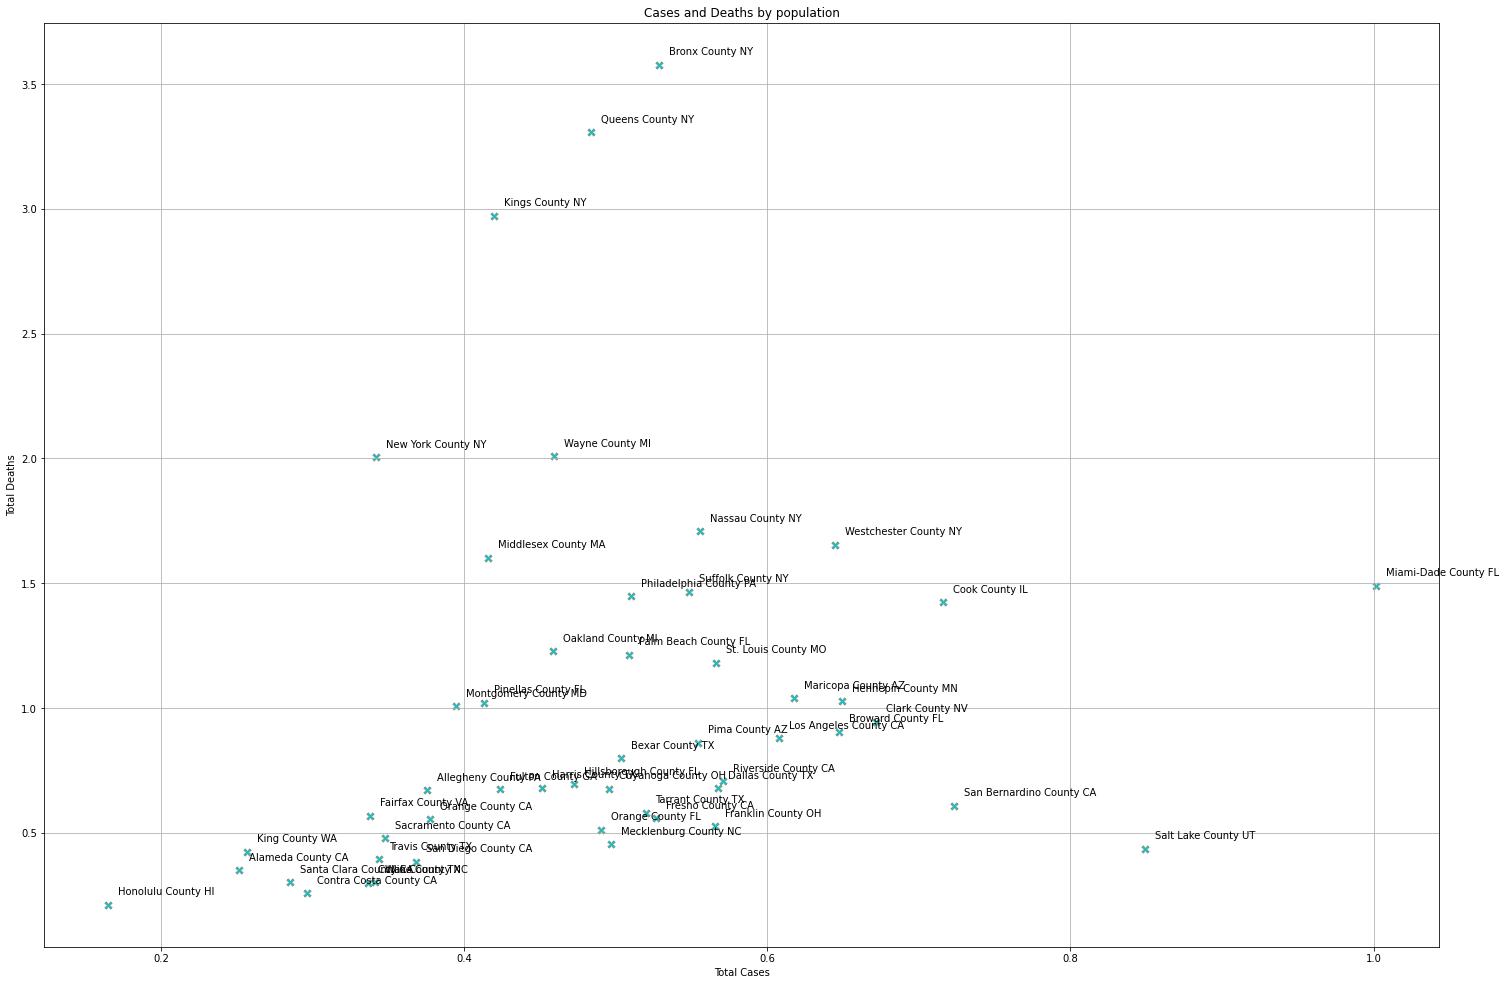

In [10]:
x_50 = top_50['normalized_cases'].values
y_50 = top_50['normalized_deaths'].values
types_50 = top_50['County Name'].values + " " + top_50['State'].values
fig, ax = plt.subplots(figsize=(25, 17))

plt.title('Cases and Deaths by population')
plt.ylabel('Total Deaths')
plt.xlabel('Total Cases')
for i, txt in enumerate(types_50):
    ax.annotate(txt, (x_50[i], y_50[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x_50, y_50, marker='x')
plt.grid(True)
plt.show()




## DM5.3 Develop 4 Clusters using K-Means and view clusters

### Use Scikit Learn kmeans library for clustering data using total deaths and total cases

In [11]:
kmeans_50 = KMeans(n_clusters=4)
matrix = top_50[['normalized_cases', 'normalized_deaths']]
km_50 = kmeans_50.fit(matrix)
labels_50 = km_50.labels_
top_50['cluster'] = labels_50
labels_50

array([3, 0, 1, 3, 1, 1, 0, 1, 2, 1, 3, 2, 1, 1, 1, 3, 3, 1, 0, 1, 0, 0,
       0, 1, 3, 0, 1, 2, 1, 0, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       1, 1, 3, 3, 1, 0], dtype=int32)

### Plot clustering results

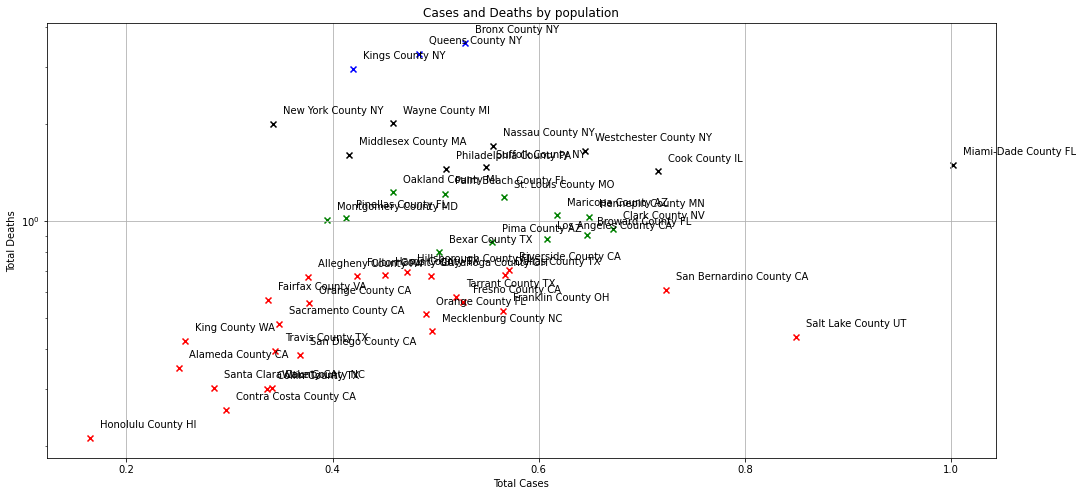

In [12]:
cluster_50 = labels_50
fig, ax = plt.subplots(figsize=(17, 8))
plt.title('Cases and Deaths by population')
plt.ylabel('Total Deaths')
plt.xlabel('Total Cases')
ax.set_yscale('log')
for i, txt in enumerate(types_50):
    ax.annotate(txt, (x_50[i], y_50[i]), xytext=(10,10), textcoords='offset points')
    if cluster_50[i] == 0:
      plt.scatter(x_50[i], y_50[i], marker='x', color='black')
    if cluster_50[i] == 1:
      plt.scatter(x_50[i], y_50[i], marker='x', color='red')
    if cluster_50[i] == 2:
      plt.scatter(x_50[i], y_50[i], marker='x', color='blue')
    if cluster_50[i] == 3:
      plt.scatter(x_50[i], y_50[i], marker='x', color='green')
plt.grid(True)
plt.show()

## DM5.4 Extaned analysis to top 1800 counties - leaving the tiny ones


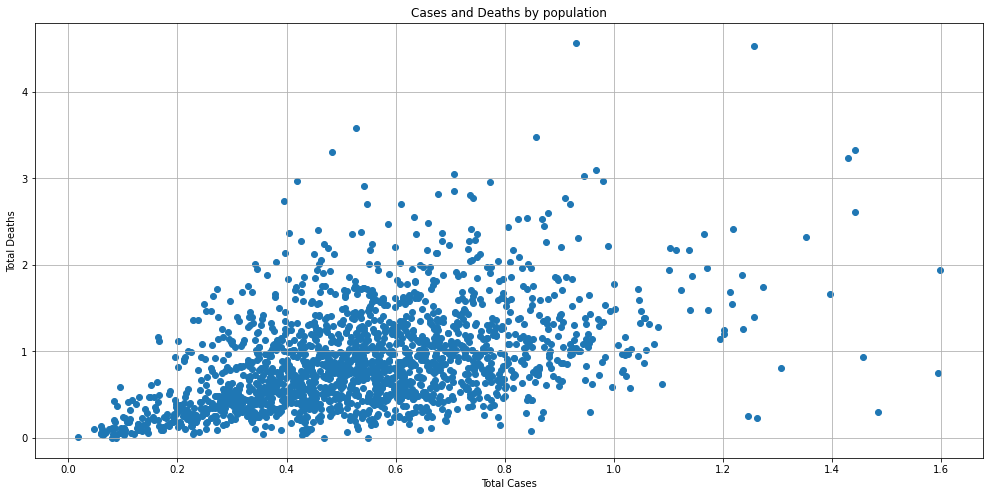

In [13]:
abt_by_county_top_1800 = abt_by_county_sorted[:1800]
x_1800 = abt_by_county_top_1800['normalized_cases'].values
y_1800 = abt_by_county_top_1800['normalized_deaths'].values

fig, ax = plt.subplots(figsize=(17, 8))

plt.title('Cases and Deaths by population')
plt.ylabel('Total Deaths')
plt.xlabel('Total Cases')
ax.scatter(x_1800, y_1800)
plt.grid(True)
plt.show()

In [14]:
abt_by_county_sorted[1800:1801]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,County Name,countyFIPS,State,stateFIPS,Date,Total Cases,Incremental Cases,cases moving_average,Total Deaths,Incremental Deaths,death moving_average,population,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,normalized_cases,normalized_deaths
430524,430524,430524,430858,Clinton County,29049,MO,29,2020-12-19,1156,11.0,10.714286,50,0.0,0.285714,20387,US,United States,Missouri,Clinton County,NaN,NaN,29049.0,2020-12-19,NaN,NaN,NaN,NaN,0.0,NaN,0.567028,2.452543


### Apply k-means to the larger set

In [15]:
kmeans_1800 = KMeans(n_clusters=4)
matrix = abt_by_county_top_1800[['normalized_cases', 'normalized_deaths']]
km_1800 = kmeans_1800.fit(matrix)
labels_1800 = km_1800.labels_
abt_by_county_top_1800['cluster'] = labels_1800
labels_1800

array([0, 2, 0, ..., 0, 1, 0], dtype=int32)

In [16]:
type(matrix['normalized_cases'])

pandas.core.series.Series

### Plot clustering results


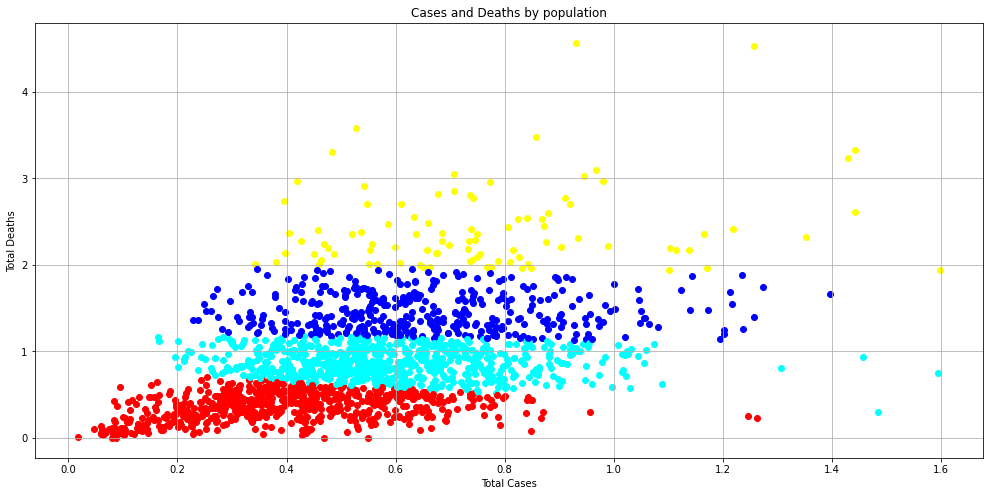

In [17]:
x_1800 = abt_by_county_top_1800['normalized_cases'].values
y_1800 = abt_by_county_top_1800['normalized_deaths'].values
cluster_1800 = abt_by_county_top_1800['cluster'].values
fig, ax = plt.subplots(figsize=(17, 8))
plt.title('Cases and Deaths by population')
plt.ylabel('Total Deaths')
plt.xlabel('Total Cases')
for i, cluster_code in enumerate(cluster_1800):
    if cluster_code == 0:
      plt.scatter(x_1800[i], y_1800[i], color='cyan')
    if cluster_code == 1:
      plt.scatter(x_1800[i], y_1800[i], color='red')
    if cluster_code == 2:
      plt.scatter(x_1800[i], y_1800[i], color='blue')
    if cluster_code == 3:
      plt.scatter(x_1800[i], y_1800[i], color='yellow')
plt.grid(True)
plt.show()

## DM5.5 - Conduct clustering exercie for incremental cases and incremental deaths on Dec-19 for top 50 counties - CLASS ASSIGNMENT

In [18]:
abt_by_county_last = abt_by_county[abt_by_county['Date'] == '2020-12-19']
abt_by_county_last['normalized_cases'] = abt_by_county_last['Incremental Cases']*10/abt_by_county_last['population']
abt_by_county_last['normalized_deaths'] = abt_by_county_last['Incremental Deaths']*1000/abt_by_county_last['population']

In [19]:
abt_by_county_sorted = abt_by_county_last.sort_values(by=['population'], ascending=False)
top_50 = abt_by_county_sorted[:50]
top_50

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,County Name,countyFIPS,State,stateFIPS,Date,Total Cases,Incremental Cases,cases moving_average,Total Deaths,Incremental Deaths,death moving_average,population,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,normalized_cases,normalized_deaths
1013020,1013020,1013020,1013354,Los Angeles County,6037,CA,6,2020-12-19,610372,13651.0,13928.571429,8817,60.0,78.285714,10039107,US,United States,California,Los Angeles County,NaN,NaN,6037.0,2020-12-19,-34.0,-10.0,-36.0,-39.0,-22.0,11.0,0.013598,0.005977
120906,120906,120906,121240,Cook County,17031,IL,17,2020-12-19,368824,2804.0,2766.142857,7336,25.0,47.857143,5150233,US,United States,Illinois,Cook County,NaN,NaN,17031.0,2020-12-19,-25.0,-3.0,-5.0,-32.0,-11.0,6.0,0.005444,0.004854
808278,808278,808278,808612,Harris County,48201,TX,48,2020-12-19,212686,0.0,1119.428571,3203,0.0,8.714286,4713325,US,United States,Texas,Harris County,NaN,NaN,48201.0,2020-12-19,-20.0,-12.0,-59.0,-27.0,-16.0,7.0,0.000000,0.000000
662988,662988,662988,663322,Maricopa County,4013,AZ,4,2020-12-19,277071,3045.0,3821.714286,4661,51.0,48.142857,4485414,US,United States,Arizona,Maricopa County,NaN,NaN,4013.0,2020-12-19,-19.0,-5.0,-38.0,-20.0,-13.0,6.0,0.006789,0.011370
1019032,1019032,1019032,1019366,San Diego County,6073,CA,6,2020-12-19,122972,2509.0,2573.714286,1280,27.0,18.428571,3338330,US,United States,California,San Diego County,NaN,NaN,6073.0,2020-12-19,-32.0,-11.0,-35.0,-45.0,-20.0,10.0,0.007516,0.008088
1016694,1016694,1016694,1017028,Orange County,6059,CA,6,2020-12-19,119822,3445.0,2918.428571,1760,26.0,11.428571,3175692,US,United States,California,Orange County,NaN,NaN,6059.0,2020-12-19,-33.0,-4.0,-25.0,-30.0,-21.0,10.0,0.010848,0.008187
38074,38074,38074,38408,Miami-Dade County,12086,FL,12,2020-12-19,272098,2382.0,2376.571429,4050,16.0,12.142857,2716940,US,United States,Florida,Miami-Dade County,NaN,NaN,12086.0,2020-12-19,-21.0,-10.0,-49.0,-36.0,-14.0,5.0,0.008767,0.005889
793582,793582,793582,793916,Dallas County,48113,TX,48,2020-12-19,149533,0.0,1175.714286,1788,0.0,10.428571,2635516,US,United States,Texas,Dallas County,NaN,NaN,48113.0,2020-12-19,-19.0,-10.0,-32.0,-25.0,-14.0,5.0,0.000000,0.000000
545420,545420,545420,545754,Kings County,36047,NY,36,2020-12-19,107392,1037.0,1035.857143,7607,10.0,7.428571,2559903,US,United States,New York,Kings County,NaN,NaN,36047.0,2020-12-19,-35.0,-12.0,-9.0,-35.0,-21.0,8.0,0.004051,0.003906
1017696,1017696,1017696,1018030,Riverside County,6065,CA,6,2020-12-19,141062,0.0,4016.000000,1744,0.0,24.428571,2470546,US,United States,California,Riverside County,NaN,NaN,6065.0,2020-12-19,-23.0,-4.0,-43.0,-31.0,-18.0,8.0,0.000000,0.000000


In [ ]:
x_50 = top_50['normalized_cases'].values
y_50 = top_50['normalized_deaths'].values
types_50 = top_50['County Name'].values + " " + top_50['State'].values
fig, ax = plt.subplots(figsize=(25, 17))

plt.title('Incremental Cases and Deaths by population')
plt.ylabel('Incremental Deaths')
plt.xlabel('Incremental Cases')
for i, txt in enumerate(types_50):
    ax.annotate(txt, (x_50[i], y_50[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x_50, y_50, marker='x')
plt.grid(True)
plt.show()

In [20]:
kmeans_50 = KMeans(n_clusters=4)
matrix = top_50[['normalized_cases', 'normalized_deaths']]
km_50 = kmeans_50.fit(matrix)
labels_50 = km_50.labels_
top_50['cluster'] = labels_50
labels_50

array([3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 1, 2, 0, 0, 0, 0, 3, 3, 0, 3,
       3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 1, 0, 1, 3, 0, 0, 0, 3, 0, 0, 1,
       0, 2, 1, 0, 0, 3], dtype=int32)

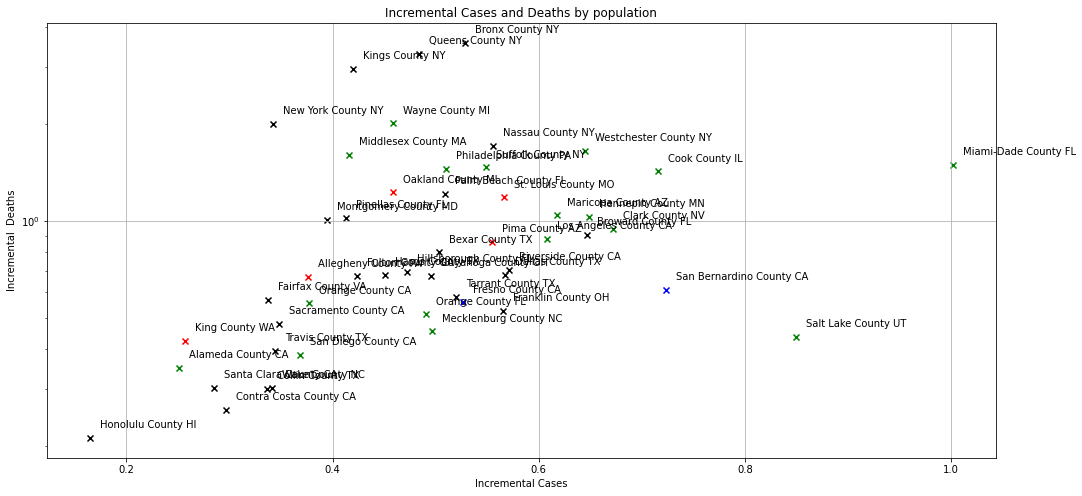

In [21]:
cluster_50 = labels_50
fig, ax = plt.subplots(figsize=(17, 8))
plt.title('Incremental Cases and Deaths by population')
plt.ylabel('Incremental  Deaths')
plt.xlabel('Incremental Cases')
ax.set_yscale('log')
for i, txt in enumerate(types_50):
    ax.annotate(txt, (x_50[i], y_50[i]), xytext=(10,10), textcoords='offset points')
    if cluster_50[i] == 0:
      plt.scatter(x_50[i], y_50[i], marker='x', color='black')
    if cluster_50[i] == 1:
      plt.scatter(x_50[i], y_50[i], marker='x', color='red')
    if cluster_50[i] == 2:
      plt.scatter(x_50[i], y_50[i], marker='x', color='blue')
    if cluster_50[i] == 3:
      plt.scatter(x_50[i], y_50[i], marker='x', color='green')
plt.grid(True)
plt.show()

## DM5.6 Conduct Clustering exercise for top 1800 counties 

In [ ]:
abt_by_county_top_1800 = abt_by_county_sorted[:1800]
x_1800 = abt_by_county_top_1800['normalized_cases'].values
y_1800 = abt_by_county_top_1800['normalized_deaths'].values

fig, ax = plt.subplots(figsize=(17, 8))

plt.title('Incremental Cases and Deaths by population')
plt.ylabel('Incremental Deaths')
plt.xlabel('Incremental Cases')
ax.scatter(x_1800, y_1800)
plt.grid(True)
plt.show()

In [22]:
abt_by_county_sorted[1800:1801]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,County Name,countyFIPS,State,stateFIPS,Date,Total Cases,Incremental Cases,cases moving_average,Total Deaths,Incremental Deaths,death moving_average,population,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,normalized_cases,normalized_deaths
430524,430524,430524,430858,Clinton County,29049,MO,29,2020-12-19,1156,11.0,10.714286,50,0.0,0.285714,20387,US,United States,Missouri,Clinton County,NaN,NaN,29049.0,2020-12-19,NaN,NaN,NaN,NaN,0.0,NaN,0.005396,0.0


In [23]:
kmeans_1800 = KMeans(n_clusters=4)
matrix = abt_by_county_top_1800[['normalized_cases', 'normalized_deaths']]
km_1800 = kmeans_1800.fit(matrix)
labels_1800 = km_1800.labels_
abt_by_county_top_1800['cluster'] = labels_1800
labels_1800

array([0, 3, 0, ..., 0, 1, 0], dtype=int32)

In [24]:
type(matrix['normalized_cases'])

pandas.core.series.Series

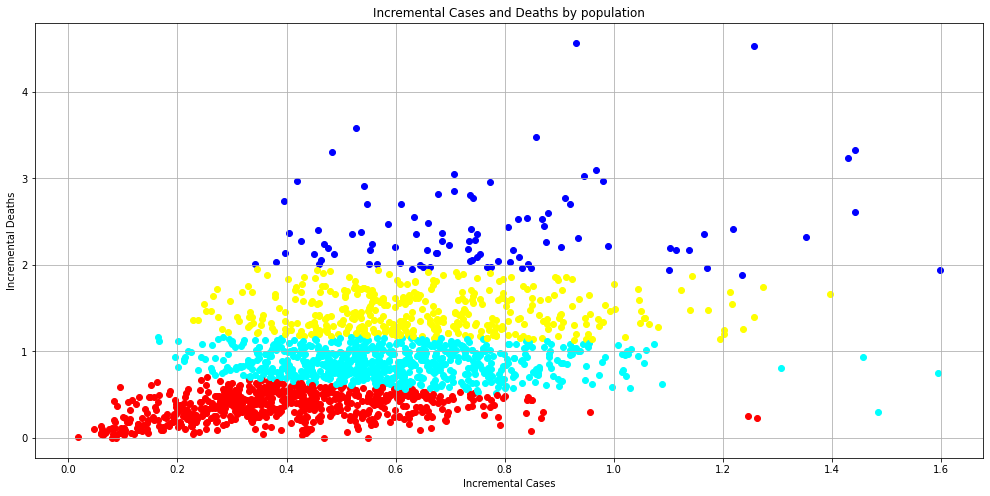

In [25]:
x_1800 = abt_by_county_top_1800['normalized_cases'].values
y_1800 = abt_by_county_top_1800['normalized_deaths'].values
cluster_1800 = abt_by_county_top_1800['cluster'].values
fig, ax = plt.subplots(figsize=(17, 8))
plt.title('Incremental Cases and Deaths by population')
plt.ylabel('Incremental Deaths')
plt.xlabel('Incremental Cases')
for i, cluster_code in enumerate(cluster_1800):
    if cluster_code == 0:
      plt.scatter(x_1800[i], y_1800[i], color='cyan')
    if cluster_code == 1:
      plt.scatter(x_1800[i], y_1800[i], color='red')
    if cluster_code == 2:
      plt.scatter(x_1800[i], y_1800[i], color='blue')
    if cluster_code == 3:
      plt.scatter(x_1800[i], y_1800[i], color='yellow')
plt.grid(True)
plt.show()